In [14]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('../src')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/marcel/git/histographer-analysis/src


In [15]:
from pathlib import Path
import cv2
data_dir = Path('../data')
print(os.getcwd())

/home/marcel/git/histographer-analysis/src


In [16]:
from histographer.analysis.image.segment import segment_rgb

tissue_samples = [cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB) for path in data_dir.iterdir()]

<IPython.core.display.Javascript object>


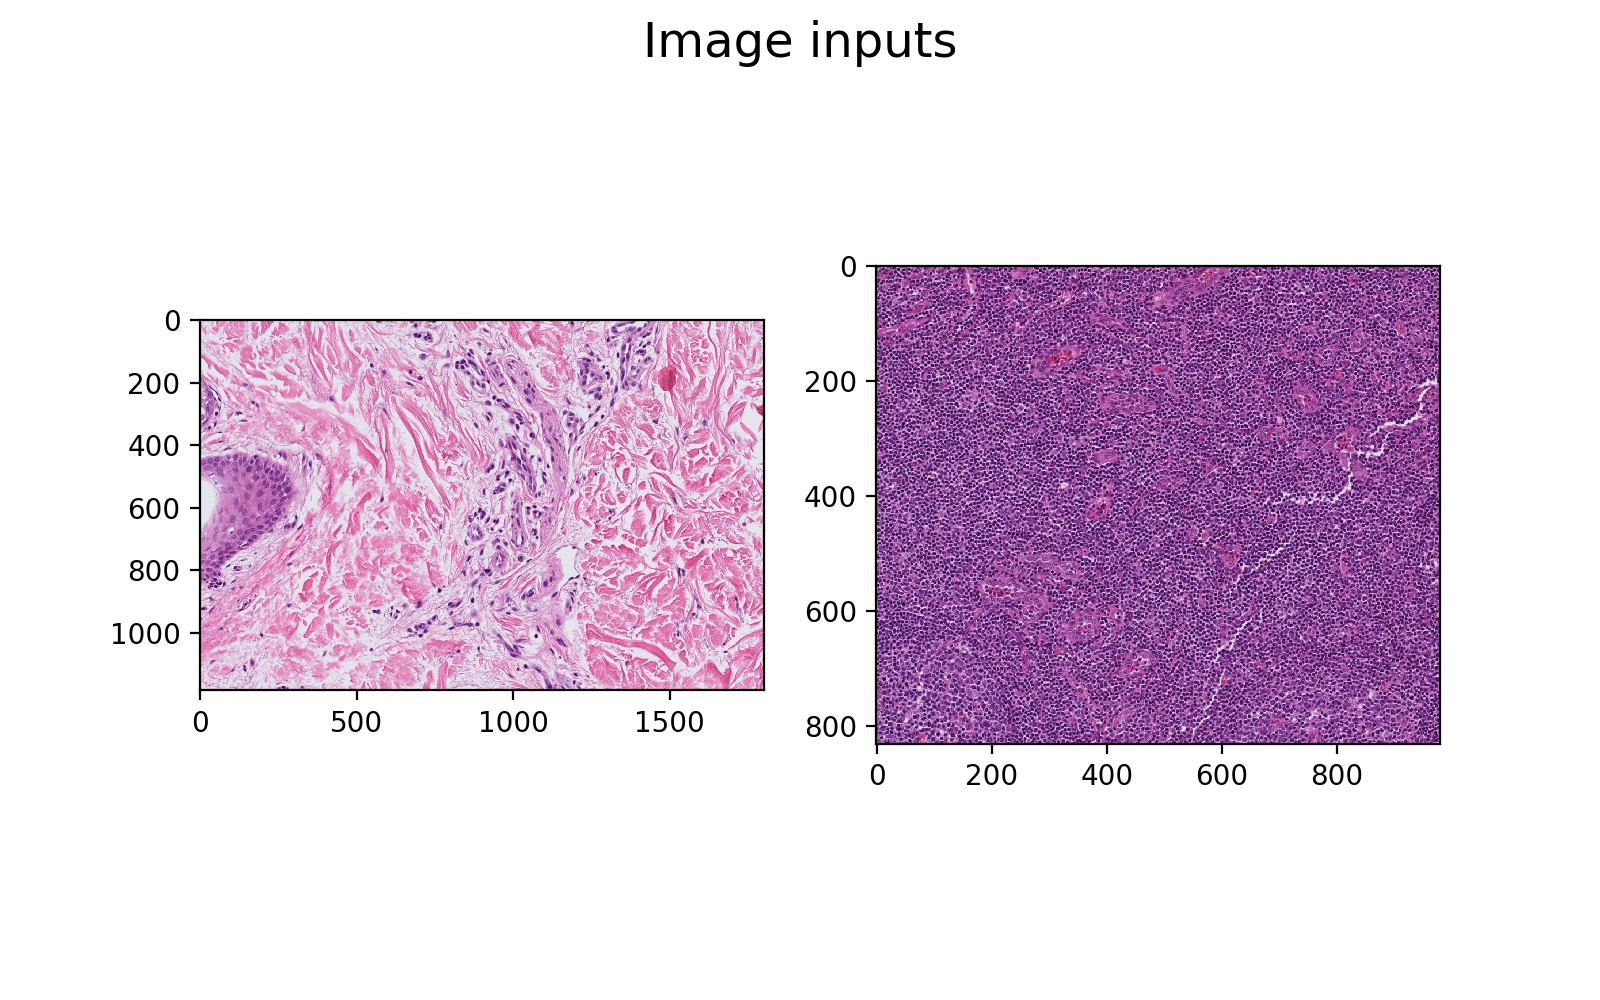

In [17]:
# Plot inputs
import matplotlib.pyplot as plt
%matplotlib notebook
fig, axs = plt.subplots(1, 2)
fig.suptitle('Image inputs', fontsize='xx-large')
fig.set_facecolor('white')
fig.set_size_inches(8, 5)
fig.set_dpi(100)
for i, sample in enumerate(tissue_samples):
    axs[i].imshow(sample)
plt.show()

<IPython.core.display.Javascript object>


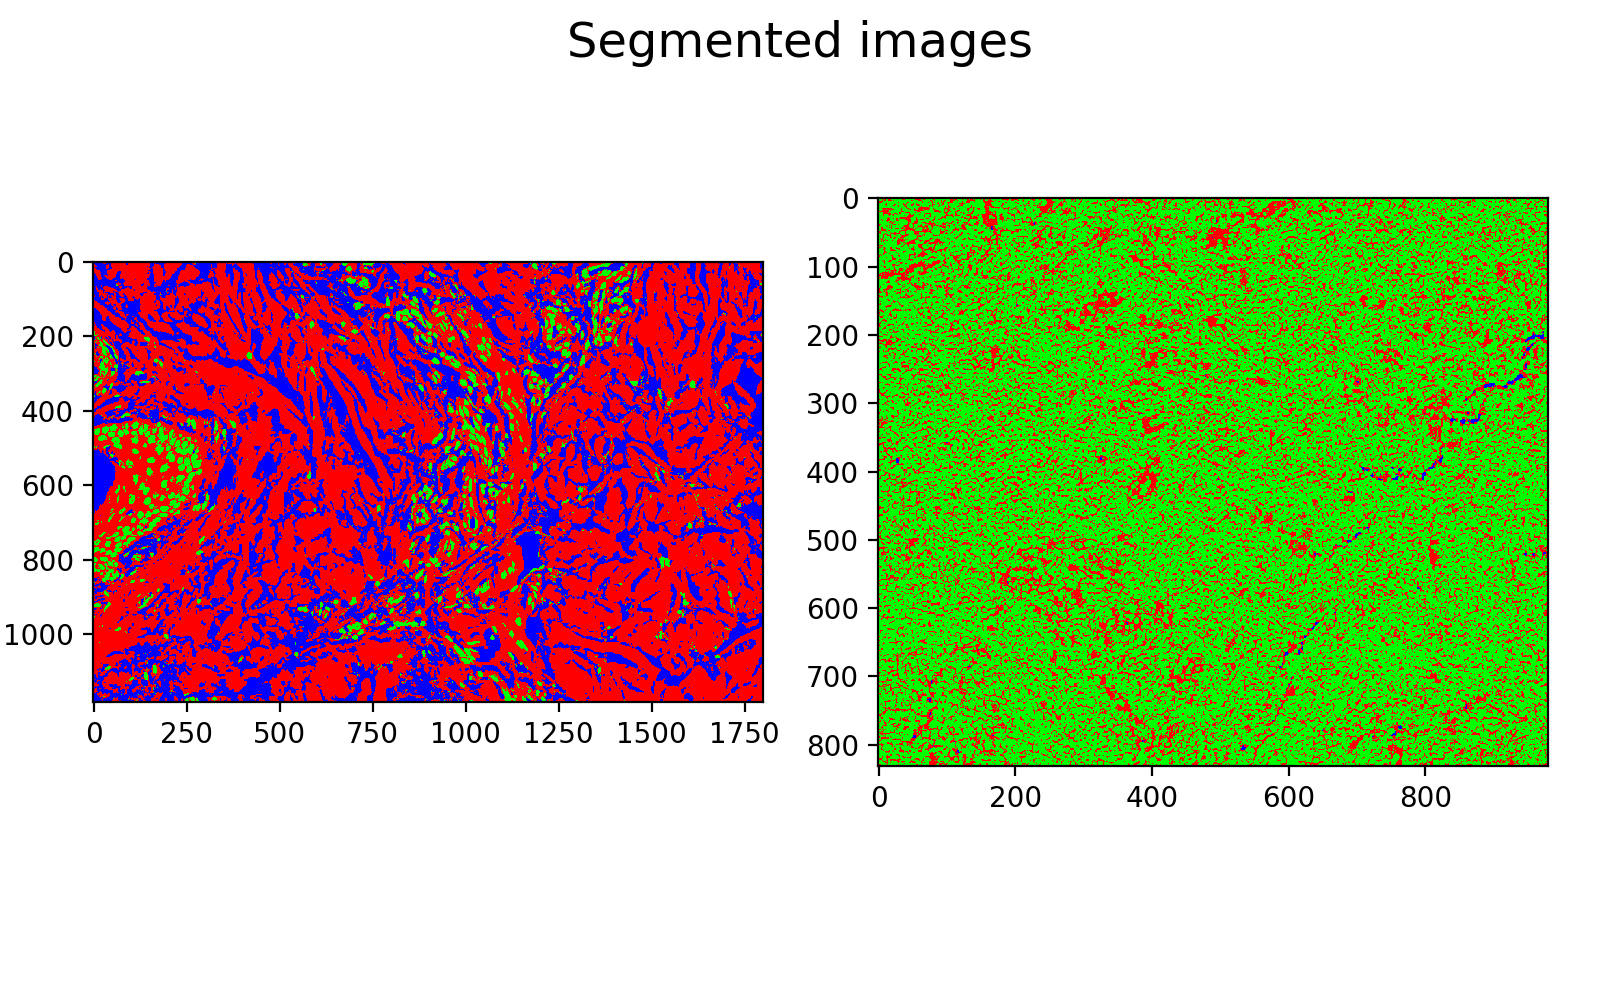

In [13]:
%matplotlib notebook

from IPython.display import HTML, display

display(HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>'''))


# produce vector inline graphics
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')

# Segmentation
import numpy as np
from IPython.display import clear_output

def update_image(cutoff_tis, cutoff_nuc):
    for i, sample in enumerate(tissue_samples):
        tissue, nucleus, no_class = segment_rgb(sample, parameters={'cutoff_tissue': cutoff_tis, 'cutoff_nucleus': cutoff_nuc})
        manip = sample.copy()
        manip[tissue, ...] = [255, 0, 0]
        manip[nucleus, ...] = [0, 255, 0]
        manip[no_class, ...] = [0, 0, 255]
        ims[i].set_data(manip)
    fig.canvas.draw()

fig, axs = plt.subplots(1, 2)
fig.suptitle('Segmented images', fontsize='xx-large')
fig.set_facecolor('white')
fig.set_size_inches(8, 5)
plt.tight_layout()
fig.set_dpi(100)
ims = np.empty(axs.shape, dtype='object')
for i, sample in enumerate(tissue_samples):
    tissue, nucleus, no_class = segment_rgb(sample, parameters={'cutoff_tissue': 100, 'cutoff_nucleus': 100})
    manip = sample.copy()
    manip[tissue, ...] = [255, 0, 0]
    manip[nucleus, ...] = [0, 255, 0]
    manip[no_class, ...] = [0, 0, 255]
    ims[i] = axs[i].imshow(manip)
clear_output(wait=True)
plt.show()

In [18]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


interact(update_image, cutoff_nuc=widgets.IntSlider(min=80, max=120, step=1, value=100, continuous_update=False), cutoff_tis=widgets.IntSlider(min=80, max=120, step=1, value=100, continuous_update=False))

interactive(children=(IntSlider(value=100, continuous_update=False, description='cutoff_tis', max=120, min=80)…

<function __main__.update_image(cutoff_tis, cutoff_nuc)>

In [ ]:
import pandas as pd

from histographer.analysis.image.high_level import 

In [ ]:
import pandas as pd

from histographer.analysis.image.high_level import 